<a href="https://colab.research.google.com/github/PremWoods/PremWoods.github.io/blob/main/Time%20Series%20Cluster%2C%20ODA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
#!pip install world-bank-data
import pandas as pd
import world_bank_data as wb
import scipy.cluster.hierarchy as sch

df = pd.DataFrame(wb.get_series('DC.ODA.TOTL.CD'))

df.to_csv("Aid_given.csv")

df2 = pd.read_csv("Aid_given.csv")

df3 = df2.drop("Series", axis=1)

df4 = df3.dropna(axis=0)

df4['DC.ODA.TOTL.CD'] = df4['DC.ODA.TOTL.CD']/1000000

df4.rename(columns={'DC.ODA.TOTL.CD': 'Aid_mil'}, inplace=True)

df5 = df4.set_index("Country")

df5_wide = df5.pivot_table(values='Aid_mil', index='Year', columns='Country')

df5_wide.to_csv('Time_aid_donors.csv')



<ipython-input-161-73719e3d883b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['DC.ODA.TOTL.CD'] = df4['DC.ODA.TOTL.CD']/1000000
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [190]:
# normalise dataset to look at behaviour (want to see if donor countries behave the same over time with aid)

stocks = pd.read_csv('Time_aid_donors.csv').dropna()
print(len(stocks.columns))
for x in stocks.columns[1:32]:
  stocks[x+'_z_norm']= (stocks[x] - stocks[x].mean())/stocks[x].std()
stock_stack=stocks.set_index('Year').stack().reset_index()
stock_stack.columns=['Year','Country','Value']
stock_stack=stock_stack[stock_stack['Country'].str.contains('z_norm')]
stock_stack



32


,Year,Country,Value
31,2006,Australia_z_norm,-1.434135
32,2006,Austria_z_norm,0.749975
33,2006,Belgium_z_norm,-1.215196
34,2006,Canada_z_norm,-1.541642
35,2006,Czechia_z_norm,-1.662692
...,...,...,...
925,2020,Switzerland_z_norm,1.239103
926,2020,Thailand_z_norm,-0.166412
927,2020,Turkiye_z_norm,1.309621
928,2020,United Kingdom_z_norm,1.006544


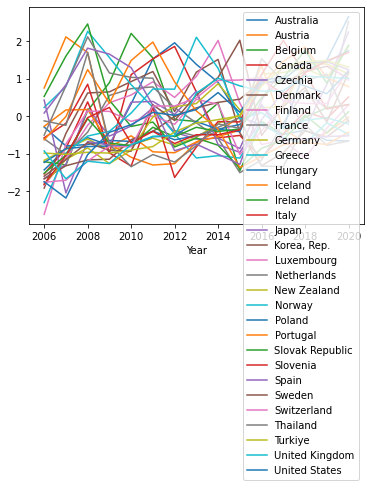

In [191]:
timeSeries=stock_stack.set_index(['Year','Country']).unstack()['Value']
timeSeries.columns=[i.replace("_z_norm", "") for i in timeSeries.columns]
timeSeries
timeSeries.plot()

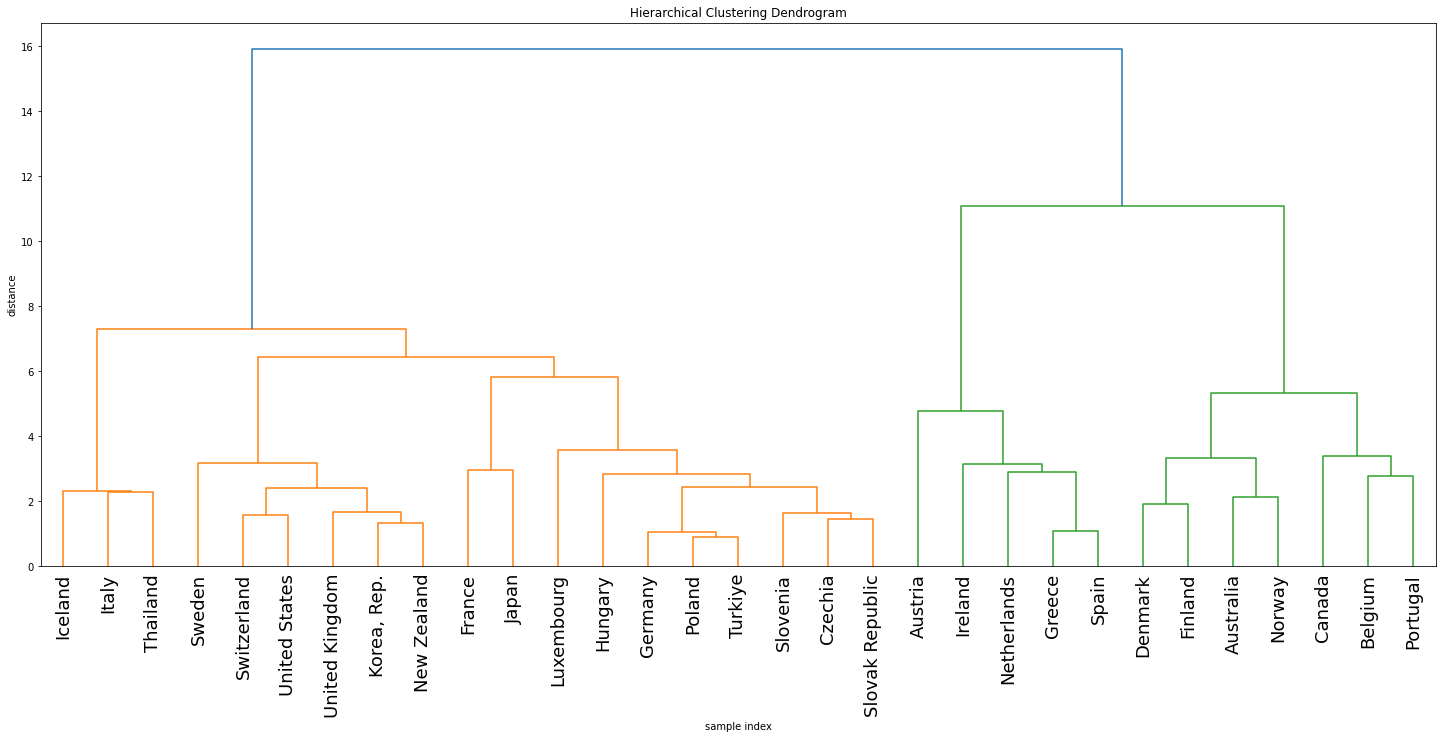

In [212]:
from sklearn.tree import export_graphviz
import graphviz

Z = sch.linkage(timeSeries.T, method='ward', metric='euclidean')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    labels=timeSeries.columns
)

plt.savefig("dendo.png")

